In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy import optimize
from wavefunction import *
from wavefunction.wavefunction1d import *
from wavefunction.utils import *
from AC_qubit_func import U_ho

Populating the interactive namespace from numpy and matplotlib


In [2]:
params = {'EJ':6.25,'EC':6.25,'EL':0.0004,'ECL':8,'Delta_EJ':0}

In [3]:
args = {'Phi_min':-9*pi,'Phi_max':9*pi,'Qdim':5,'gridsize':80}

In [4]:
E_J =params['EJ']
E_C = params['EC']
E_L = params['EL']
E_CL = params['ECL']
Delta_E_J =params['Delta_EJ']

phi_min = args['Phi_min']
phi_max = args['Phi_max']
gridsize=args['gridsize'] # grid size along coordinate phi
Q_dim=args['Qdim']

In [5]:
Q_list = np.arange(Q_dim)
ng = 0.5
phi0 = np.pi

In [6]:
Q = np.diag(Q_list).astype(np.complex)
    
Q_dim = np.size(Q_list)
Q_ = np.zeros((Q_dim,Q_dim)).astype(np.complex)
for m in range(0,Q_dim):
    for n in range(0,Q_dim):
        Q_[m,n]=mod_kron(m+1,n)+mod_kron(m-1,n)

Q_p = np.zeros((Q_dim,Q_dim)).astype(np.complex)
for m in range(0,Q_dim):
    for n in range(0,Q_dim):
        Q_p[m,n]=-1j*mod_kron(m+1,n)+1j*mod_kron(m-1,n)


# charging energy of CPB
H0 = 4* E_C * np.kron( (np.diag((Q_list-ng)**2)), np.diag(ones(gridsize+1)) )

x0 = phi0
# potential energy of superinductor
x = linspace(phi_min,phi_max,gridsize+1)+x0
u = assemble_u_potential(U_ho, x, {'k': E_L, 'x0': x0})
V = np.kron(np.diag(ones(Q_dim)),assemble_V(u))

# kinetic energy of superinductor
K = np.kron (np.diag(ones(Q_dim)),assemble_K(-4*E_CL,x))

#
H = K + V

# symmetric CPB
u = -E_J * np.cos(x/2)
V = np.kron(Q_, assemble_V(u)) 
H +=V

# add asymmetry to EJ
if True:
    u = - 1./2 *Delta_E_J* np.sin(x/2)
    V = np.kron(Q_p,assemble_V(u)) 
    H += V 

In [7]:
# evals, evecs = solve_eigenproblem(H+H0)
# evals = evals.real

vals, vecs = np.linalg.eig(H)
idx = np.real(vals).argsort()
evals = vals[idx]
evecs = vecs.T[idx]


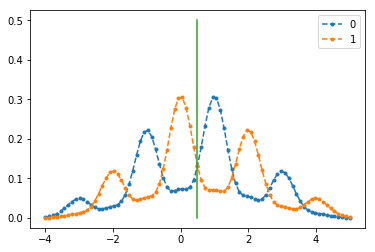

In [8]:
xp = x/np.pi/2
for i in np.arange(2):
    y = evecs[i].real
    y = y**2
    y = np.sum(y.reshape(Q_dim,gridsize+1),0)
    y = y/np.sum(y)
    y = np.sqrt(y)
    plt.plot(xp,y,'.--',label='%d'%i)
plt.legend()
plt.plot(np.ones(10)*0.5,np.linspace(-0.,0.5,10))

# u = assemble_u_potential(U_ho, x, {'k': E_L, 'x0': x0})
# plt.plot(xp,u/0.02)

In [9]:
wp = (np.sqrt(2*E_J*E_CL))
print('wp %.2f GHz' % wp)
g = 4*np.sqrt(2*E_J/E_CL)
print('E_dps %.5f GHz' % (0.8 * np.sqrt(g) * np.exp(-g) * wp))
print('EL %f GHz' % E_L)

wp 10.00 GHz
E_dps 0.12053 GHz
EL 0.000400 GHz
